In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dalex as dx
import copy
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from RashomonSetAnalyser import RashomonSetAnalyser
import pickle
import xgboost as xgb

In [2]:
results = np.load('results.npy', allow_pickle=True)
results.sort_values(by = 'mean_test_score', inplace = True, ascending = False)
results.reset_index(inplace = True)

In [3]:
best_model = results.iloc[0].params

In [4]:
rashomon = RashomonSetAnalyser()

In [5]:
X = np.load("X48.npy")
column_names = np.load('column_names.npy', allow_pickle = True)
X = pd.DataFrame(data = X, columns = column_names)
with open('y.npy', 'rb') as f:
    labels = pickle.load(f)
    
task = [yy[0] for yy in labels]
y = np.array(task)
def model_learn(X, y, params):
    model = xgb.XGBClassifier(objective = 'binary:logistic', n_jobs = -1, eval_metric = 'auc', use_label_encoder = False, seed = 123)
    model.set_params(**params)
    return model.fit(X, y)

In [40]:
best_models_tab = []
for i in range(5):
    best_models_tab.append(model_learn(X, y, results.iloc[i].params))
    print(i)



0
1
2
3
4


In [41]:
rashomon.set_base_model(best_models_tab[0])
rashomon.set_models(best_models_tab[1:])

In [42]:
rashomon.models

[['model0',
  XGBClassifier(alpha=12.854579625070118, base_score=0.5, booster='gbtree',
                colsample_bylevel=0.7371052631578947, colsample_bynode=1,
                colsample_bytree=0.6845263157894736, eval_metric='auc', gamma=0,
                gpu_id=-1, importance_type='gain', interaction_constraints='',
                lambda=0.07779328684150147, learning_rate=0.07779328684150147,
                max_delta_step=0, max_depth=11,
                min_child_weight=2.151381172440365, missing=nan,
                monotone_constraints='()', n_estimators=180, n_jobs=-1,
                num_parallel_tree=1, random_state=123, reg_alpha=12.8545799,
                reg_lambda=0.0777932853, scale_pos_weight=1, seed=123,
                subsample=0.6684210526315789, tree_method='exact',
                use_label_encoder=False, validate_parameters=1, ...)],
 ['model1',
  XGBClassifier(alpha=0.33472602530611795, base_score=0.5, booster='gbtree',
                colsample_bylevel=0.526

In [43]:
answer=rashomon.pdp_comparator(X, y)
answer

C:\Users\Maciek\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,colname,model0,model1,model2,model3
0,albumin_min,0.582661,0.796533,0.864516,0.336867
1,bicarbonate_min,0.328848,0.633176,0.437815,0.120017
2,bun_min,0.503532,0.254012,0.612883,0.096395
3,calcium_min,0.849205,1.614087,1.407563,0.477241
4,creatinine_min,0.550921,1.692719,1.224062,0.751788
...,...,...,...,...,...
71,resprate_std,0.495250,0.449849,0.370965,0.254882
72,sodium_std,0.433129,0.389927,0.527829,0.116635
73,spo2_std,0.687846,1.895705,1.871879,0.783161
74,sysbp_std,0.758506,2.210461,1.801867,0.839715


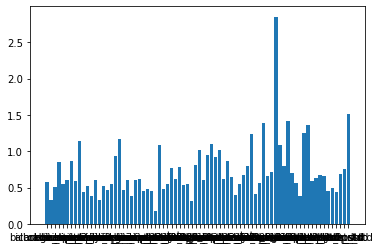

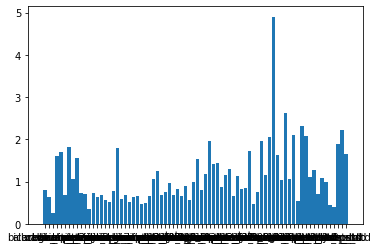

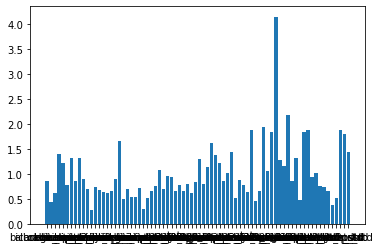

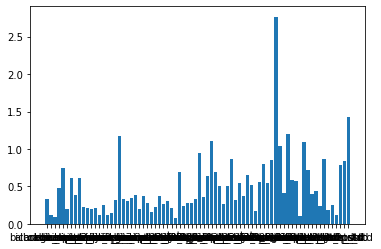

In [48]:
for i in range(answer.shape[1]-1):
    plt.bar(x=answer.iloc[:,0],height=answer.iloc[:,1+i])
    plt.show()


In [36]:
answer.iloc[:,1].sort_values(ascending=False)

57    2.849296
75    1.507040
60    1.411811
54    1.384505
65    1.360559
        ...   
21    0.386318
1     0.328848
13    0.326996
36    0.313799
27    0.174672
Name: model0, Length: 76, dtype: float64

In [37]:
answer.iloc[:,2].sort_values(ascending=False)

57    4.899044
60    2.622280
64    2.323051
74    2.210461
62    2.111978
        ...   
24    0.468468
71    0.449849
72    0.389927
11    0.348408
2     0.254012
Name: model1, Length: 76, dtype: float64

In [49]:
answer.iloc[:,3].sort_values(ascending=False)

57    4.145710
60    2.184895
54    1.934111
65    1.879066
51    1.872723
        ...   
52    0.450073
1     0.437815
71    0.370965
24    0.304323
11    0.282079
Name: model2, Length: 76, dtype: float64

In [67]:
answer.iloc[:,4].sort_values(ascending=False)

57    2.766379
75    1.429297
60    1.197599
18    1.178581
41    1.106359
        ...   
13    0.114868
15    0.113277
63    0.101588
2     0.096395
32    0.083579
Name: model3, Length: 76, dtype: float64

In [33]:
answer.iloc[:,0][57]

'albumin_std'

In [51]:
answer.iloc[:,0][60]

'calcium_std'

55.101437985897064
84.94526234269142
76.55417367815971
37.52999607473612


<BarContainer object of 4 artists>

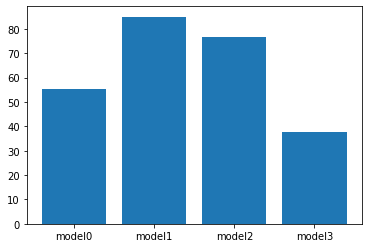

In [63]:
sums=[]
names=[]
for i in range(answer.shape[1]-1):
    print(sum(answer.iloc[:,i+1]))
    sums.append(sum(answer.iloc[:,1+i]))
    names.append("model"+str(i))
plt.bar(height=sums,x=names)

In [64]:
answer2=rashomon.pdp_comparator(X, y, metric='sum')
answer2

C:\Users\Maciek\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,colname,model0,model1,model2,model3
0,albumin_min,0.582661,0.796533,0.864516,0.332777
1,bicarbonate_min,0.217265,0.633176,0.437815,0.088926
2,bun_min,0.503532,0.254012,0.612883,0.084776
3,calcium_min,0.849205,1.614087,1.407563,0.460671
4,creatinine_min,0.537080,1.692719,1.220715,0.370342
...,...,...,...,...,...
71,resprate_std,0.495250,0.449849,0.335705,0.234316
72,sodium_std,0.433129,0.378568,0.520677,0.092683
73,spo2_std,0.643985,1.895705,1.871879,0.601481
74,sysbp_std,0.752026,2.210461,1.801867,0.701805


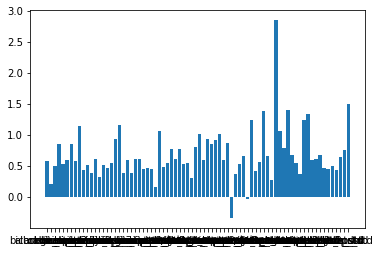

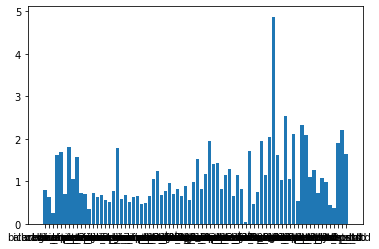

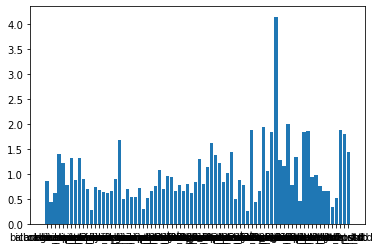

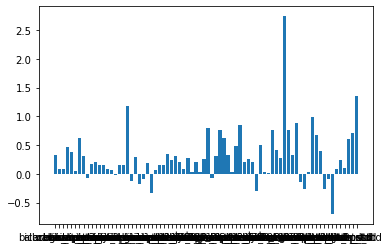

In [65]:
for i in range(answer2.shape[1]-1):
    plt.bar(x=answer2.iloc[:,0],height=answer2.iloc[:,1+i])
    plt.show()


In [69]:
answer2.iloc[:,4].sort_values(ascending=False)

57    2.738066
75    1.353270
18    1.174626
64    0.981022
60    0.883141
        ...   
67   -0.261743
62   -0.266558
50   -0.298689
24   -0.335525
69   -0.699810
Name: model3, Length: 76, dtype: float64

51.88358474522829
83.90481328219175
75.64710095524788
21.529809065163136


<BarContainer object of 4 artists>

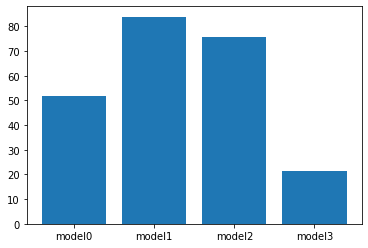

In [66]:
sums=[]
names=[]
for i in range(answer2.shape[1]-1):
    print(sum(answer2.iloc[:,i+1]))
    sums.append(sum(answer2.iloc[:,1+i]))
    names.append("model"+str(i))
plt.bar(height=sums,x=names)